## Factorial Analysis of Mixed Data
*Summary:* We analyse the dataset using FAMD from the `prince` package to find the number of components that explain 95% and 99% of the variance. The result for 95% variance is 157 components. 

Read data from csv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("../dataset/UNSW_NB15_training-set.csv")
test = pd.read_csv("../dataset/UNSW_NB15_testing-set.csv")

Here, we concatenate the `train` and `test` sets, and drop the "id" column. Furthermore, we get the categorical and numerical columns from the dataframe. 

In [42]:
df = pd.concat([train, test]).reset_index(drop=True)
df = df.drop(columns=['id', 'label', 'attack_cat'], axis=1)

# get numeric column names
num_cols = df._get_numeric_data().columns

# subract numeric columns from all columns to get categorical columns 
cat_cols = list(set(df.columns) - set(num_cols))

(len(num_cols), len(cat_cols))

(39, 3)

We get the total number of features by one-hot encoding the categorical features plus the number of numerical features

In [44]:
num_components = pd.get_dummies(df[cat_cols]).shape[1] + df[num_cols].shape[1]
num_components

196

FAMD is used to analyse the mixed dataset

In [45]:
from prince import FAMD

famd = FAMD(
    n_components=num_components,
    n_iter=5,
    random_state=42,
)
famd = famd.fit(df)

We plot the cumulative inertia against the number of components. This results in around 148 components that explain 95% of the variance

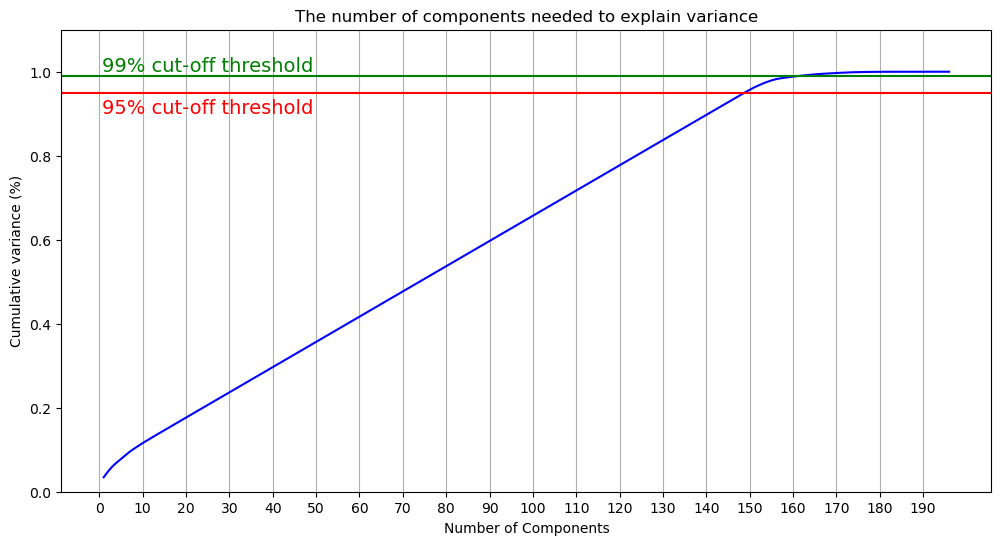

In [47]:
fig, ax = plt.subplots()
xi = np.arange(1, num_components+1, step=1)
y = np.cumsum(famd.explained_inertia_)

plt.rcParams["figure.figsize"] = (12,6)

plt.ylim(0.0, 1.1)
plt.plot(xi, y, linestyle='-', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, num_components+1, step=10))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.9, '95% cut-off threshold', color='red', fontsize=14)

plt.axhline(y=0.99, color='g', linestyle='-')
plt.text(0.5, 1, '99% cut-off threshold', color='green', fontsize=14)

ax.grid(axis='x')
plt.show()